In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datascience import *
%matplotlib inline

plt.style.use('classic')


<b> NBA 2014-2015 Shot Log Data Analysis <b>

In [2]:
#Zachary Parks 
#Project 1
#Data retrieved from https://www.kaggle.com/dansbecker/nba-shot-logs/home
#2014-2015 NBA season shot log data 

#loads the data into a pandas data frame 
shots = pd.read_csv('shot_logs.csv')
#Take a look at the data 
shots


C:\Users\Zach Parks\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
5,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,6,2,8:15,9.1,2,...,18.4,2,missed,"Williams, Deron",101114,2.6,0,mn,brian roberts,203148
6,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,7,4,10:15,14.5,11,...,20.7,2,missed,"Jack, Jarrett",101127,6.1,0,0,brian roberts,203148
7,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,8:00,3.4,3,...,3.5,2,made,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148
8,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,9,4,5:14,12.4,0,...,24.6,3,missed,"Morris, Darius",202721,7.3,0,0,brian roberts,203148
9,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,1,2,11:32,17.4,0,...,22.4,3,missed,"Ellington, Wayne",201961,19.8,0,0,brian roberts,203148


In [3]:
#Some of the Touch_Times were negative 
#It is impossible to touch a basketball for negative seconds, so those shots were removed 
cleanShots = shots.where(shots.TOUCH_TIME >= 0).dropna()


In [4]:
#Subsetting the data into three point shots and two point shots 

#The furthest NBA three point line is located at 23.75 feet from the basket
#So two point shots have to be from less than 24 feet 
twos = cleanShots.where(cleanShots.PTS_TYPE == 2).where(cleanShots.SHOT_DIST <= 23.75).dropna()

#The closest a three point shot can be, by rule in the NBA, is 22 feet, so SHOT_DIST >=22
threes = cleanShots.where(cleanShots.PTS_TYPE == 3).where(cleanShots.SHOT_DIST >= 22).dropna()


In [5]:
#Creates a data table with statistics for 4 main pieces of data in the two point shot subset
#Computes mean, 25%, median, 75%, min, and max for Dribbles, Touch Time, Defender Distance, and Shot Distance

dTwos = {'Two Pointers': ['Mean', '25%','Median', '75%', 'Min', 'Max'], 
         'Dribbles': [twos['DRIBBLES'].mean(), twos['DRIBBLES'].quantile(.25), twos['DRIBBLES'].median(),
                      twos['DRIBBLES'].quantile(.75), twos['DRIBBLES'].min(), twos['DRIBBLES'].max()],
         'Touch Time': [twos['TOUCH_TIME'].mean(), twos['TOUCH_TIME'].quantile(.25), twos['TOUCH_TIME'].median(),
                      twos['TOUCH_TIME'].quantile(.75), twos['TOUCH_TIME'].min(), twos['TOUCH_TIME'].max()],
         'Defender Distance': [twos['CLOSE_DEF_DIST'].mean(), twos['CLOSE_DEF_DIST'].quantile(.25), twos['CLOSE_DEF_DIST'].median(),
                              twos['CLOSE_DEF_DIST'].quantile(.75), twos['CLOSE_DEF_DIST'].min(), twos['CLOSE_DEF_DIST'].max()],
         'Shot Distance': [twos['SHOT_DIST'].mean(), twos['SHOT_DIST'].quantile(.25), twos['SHOT_DIST'].median(),
                      twos['SHOT_DIST'].quantile(.75), twos['SHOT_DIST'].min(), twos['SHOT_DIST'].max()]}
tableTwos = pd.DataFrame(data = dTwos)

#Formats each column to round to 2 decimal places 
tableTwos = tableTwos.style.format({'Dribbles': "{:.2f}", 'Touch Time': "{:.2f}", 'Defender Distance': "{:.2f}", 'Shot Distance': "{:.2f}"})
tableTwos

,Two Pointers,Dribbles,Touch Time,Defender Distance,Shot Distance
0,Mean,2.35,3.09,3.43,9.54
1,25%,0.00,0.90,2.00,3.70
2,Median,1.00,2.10,3.00,7.30
3,75%,3.00,4.20,4.40,16.20
4,Min,0.00,0.00,0.00,0.00
5,Max,32.00,24.50,53.20,23.70


In [6]:
#Creates a table identical to the table above, except for three point shots instead of two point shots

dThrees = {'Three Pointers': ['Mean', '25%','Median', '75%', 'Min', 'Max'], 
         'Dribbles': [threes['DRIBBLES'].mean(), threes['DRIBBLES'].quantile(.25), threes['DRIBBLES'].median(),
                      threes['DRIBBLES'].quantile(.75), threes['DRIBBLES'].min(), threes['DRIBBLES'].max()],
         'Touch Time': [threes['TOUCH_TIME'].mean(), threes['TOUCH_TIME'].quantile(.25), threes['TOUCH_TIME'].median(),
                      threes['TOUCH_TIME'].quantile(.75), threes['TOUCH_TIME'].min(), threes['TOUCH_TIME'].max()],
         'Defender Distance': [threes['CLOSE_DEF_DIST'].mean(), threes['CLOSE_DEF_DIST'].quantile(.25), threes['CLOSE_DEF_DIST'].median(),
                              threes['CLOSE_DEF_DIST'].quantile(.75), threes['CLOSE_DEF_DIST'].min(), threes['CLOSE_DEF_DIST'].max()],
         'Shot Distance': [threes['SHOT_DIST'].mean(), threes['SHOT_DIST'].quantile(.25), threes['SHOT_DIST'].median(),
                      threes['SHOT_DIST'].quantile(.75), threes['SHOT_DIST'].min(), threes['SHOT_DIST'].max()]}
tableThrees = pd.DataFrame(data = dThrees)
tableThrees = tableThrees.style.format({'Dribbles': "{:.2f}", 'Touch Time': "{:.2f}", 'Defender Distance': "{:.2f}", 'Shot Distance': "{:.2f}"})
tableThrees

,Three Pointers,Dribbles,Touch Time,Defender Distance,Shot Distance
0,Mean,1.00,1.83,6.09,24.48
1,25%,0.00,0.80,4.30,23.60
2,Median,0.00,1.00,5.40,24.50
3,75%,0.00,1.40,7.00,25.20
4,Min,0.00,0.00,0.00,22.00
5,Max,30.00,24.90,28.00,42.80


In [7]:
#Average and median Dribbles and touch time is significantly lower for three point shots
#Average and median Defender Distance is significantly higher for three point shots 

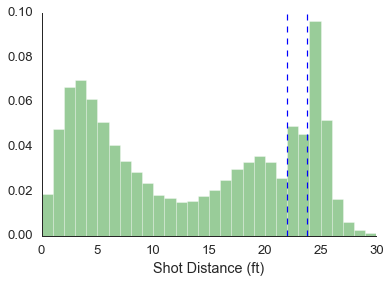

In [16]:
#Look at distribution of shot distance for the whole data set 


ax = sns.distplot(cleanShots['SHOT_DIST'], kde = False, norm_hist = True, bins = range(31), color='g')

#sets up style and removes top and right frames
sns.set_context("paper", font_scale=1.5)
sns.set_style('white')
sns.despine()
#label the x axis 
ax.set_xlabel('Shot Distance (ft)')

#Draws 2 vertical lines where the three point lines are located 
#Shows a spike in shot distribution beyond the three point lines 
plt.axvline(x=22, linestyle='--')
plt.axvline(x=23.75, linestyle='--')

Text(0.5,0,'Defender Distance (ft)')

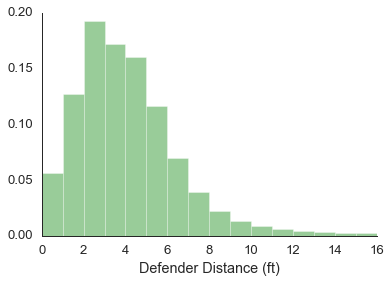

In [9]:
ax = sns.distplot(cleanShots['CLOSE_DEF_DIST'], kde = False, norm_hist = True, bins = range(17), color='g')
sns.set_context("paper", font_scale=1.5)
sns.set_style('white')
sns.despine()

ax.set_xlabel('Defender Distance (ft)')

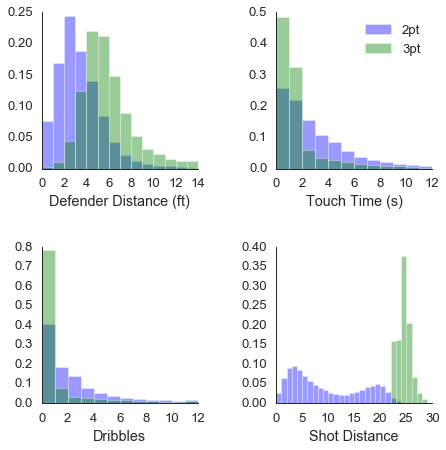

In [10]:
#Create a 2x2 small multiple to compare the data of two point and three point shots

#creates a 2x2 figure and 4 axes to plot graphs on 
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(7,7),sharey=True)

#First plot in upper left, Defender Distance
plt.subplot(221)

#Removes top and top right frames from the graph
sns.despine()
#Sets the style and makes the background white 
sns.set_context("paper", font_scale=1.5)
sns.set_style('white')

#Creates a dictionary for the two subsets of data 
data = dict()
data[0]= twos
data[1] = threes
#Makes an array for the legend 
Legend = ['2pt','3pt']

#Making 2 histograms on the same axis, one for two point and one for three point shots Defender Distance 
#Frequency tapers off significantly after Distance > 15
#Want normalized histograms with no kernal density curve 

for i in range(len(Legend)):
    ax1 = sns.distplot(data[i]['CLOSE_DEF_DIST'], bins = range(15), kde=False, norm_hist = True)
#Label the independent variable, Defender Distance 
ax1.set_xlabel('Defender Distance (ft)')


#Upper Right Plot, Touch Time 
ax2 = plt.plot(sharey=True)
plt.subplot(222)
sns.despine()

sns.set_context("paper", font_scale=1.5)
sns.set_style('white')

#Same as above, except with a legend 
#Uses 1 legend in top left graph instead of 1 legend in each graph to reduce clutter 
for i in range(len(Legend)):
    ax2 = sns.distplot(data[i]['TOUCH_TIME'], bins = range(13), kde=False, label = Legend[i], norm_hist = True)

ax2.set_xlabel('Touch Time (s)')
#Removes the border from the legend 
ax2.legend(frameon=False)

#Bottom Left plot, Dribbles
ax3 = plt.plot(sharey=True)
plt.subplot(223)
sns.despine()
sns.set_context("paper", font_scale=1.5)
sns.set_style('white')


#Same setup as previous graphs 
for i in range(len(Legend)):
    ax3 = sns.distplot(data[i]['DRIBBLES'], bins = range(13), kde=False, norm_hist = True)

ax3.set_xlabel('Dribbles')


#Bottom Left plot, Shot Distance 
ax4 = plt.plot(sharey=True)
plt.subplot(224)
sns.despine()
sns.set_context("paper", font_scale=1.5)
sns.set_style('white')

#Same setup a previous graphs but with a larger range 
for i in range(len(Legend)):
    ax4 = sns.distplot(data[i]['SHOT_DIST'], bins = range(30), kde=False, norm_hist = True)

ax4.set_xlabel('Shot Distance')


#Sets the padding between the plots 
f.subplots_adjust(hspace=.5,wspace=.5)
plt.show()


In [11]:
#Defenders are generally closer on two point shots than three point shots
#Touch Time and the number of Dribbles is generally lower for three point shots 
#Obviously, shot distance is lower for two point shots 
#Most two point shots happen in the 0-7ft range
#Most three point shots happen in the 23-25ft range 

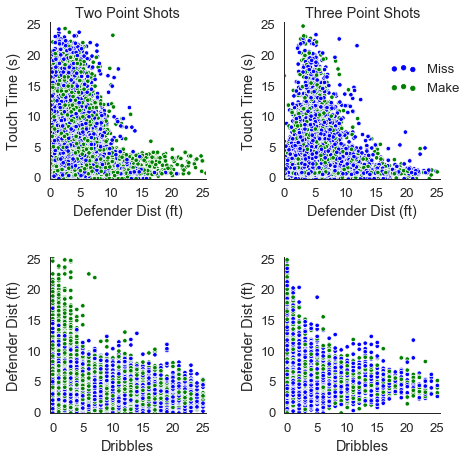

In [12]:
#Now to look at the relationship between variables 

#Set up a 2x2 small multiple again 
f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(7,7))


#Upper Right, Defender Distance vs Touch Time - Two Point
plt.subplot(221)
sns.set_context("paper", font_scale=1.5)
sns.set_style('white')
sns.despine()

#Left column is Two Point shots, Right column is Three Point Shots 
#Hue = shot is made or missed 
ax1 = sns.scatterplot(data = twos, x = 'CLOSE_DEF_DIST', y = 'TOUCH_TIME', hue = "FGM", legend = False)

#sets up range of axes
#the '.5' stops the graph from cutting off points on the edge of the range 
ax1.set(xlim=(0, 25.5))
ax1.set(ylim=(0, 25.5))
#Labels each axis and title
ax1.set_xlabel('Defender Dist (ft)')
ax1.set_ylabel('Touch Time (s)')
ax1.set_title("Two Point Shots")


#Upper Right, Defender Distance vs Touch Time - Three Point
plt.subplot(222)
sns.despine()
ax2 = sns.scatterplot(data = threes, x = 'CLOSE_DEF_DIST', y = 'TOUCH_TIME', hue = "FGM")

ax2.set(xlim=(0, 25.5))
ax2.set(ylim=(0, 25.5))
ax2.set_xlabel('Defender Dist (ft)')
ax2.set_ylabel('Touch Time (s)')
ax2.set_title("Three Point Shots")

#One legend in Upper Right Graph
#Gets the 'handles' object which has the label variables
handles, _ = ax2.get_legend_handles_labels()
#Remove the legend title and change the names
#bbox_to_anchor(x,y) moves the legend 
ax2.legend(handles, [' ',"Miss", "Make"], frameon=False, loc='center right', bbox_to_anchor=(1.2, 0.7))


#Bottom Left, Dribbles vs Defender Distance - Two Point
plt.subplot(223)
ax3 = sns.scatterplot(data = twos, x = 'DRIBBLES', y = 'CLOSE_DEF_DIST', hue = 'FGM', legend = False)
sns.despine()
ax3.set(xlim=(-.5, 25.5))
ax3.set(ylim=(0, 25.5))
ax3.set_xlabel('Dribbles')
ax3.set_ylabel('Defender Dist (ft)')


#Bottom Right, Dribbles vs Defender Distance - Three Point
plt.subplot(224)
ax4 = sns.scatterplot(data = threes, x = 'DRIBBLES', y = 'CLOSE_DEF_DIST', hue = 'FGM', legend = False)
sns.despine()
ax4.set(xlim=(-.5, 25.5))
ax4.set(ylim=(0, 25.5))
ax4.set_xlabel('Dribbles')
ax4.set_ylabel('Defender Dist (ft)')

#sets padding between plots 
f.subplots_adjust(hspace=.5,wspace=.5)
plt.show()

In [13]:
#For two point and three point shots, as defender distance increases, touch time decreases 
#Touch time is almost always < 10 seconds if the defender is 15 or more ft away 
#For three point shots, almost no shots when defender is within 3 ft and touch time > 10 seconds
#As the amount of dribbles increases, defender distance decreases 
#The time it takes to dribble allows defenders to get closer 